<a href="https://colab.research.google.com/github/rutup25/Machine-Learning/blob/main/Introduction_to_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error as MSE, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

from keras.models import Sequential
from keras.layers import Dense

In [ ]:
excel_file_path = '/content/ML Dataset.xlsx'
data = pd.read_excel(excel_file_path)
data

,Concentration,frequency,ee
0,0.0,2.000000e+01,622143.361900
1,0.0,2.118510e+01,606160.983700
2,0.0,2.244040e+01,587934.371200
3,0.0,2.377000e+01,576274.158400
4,0.0,2.517850e+01,562036.888400
...,...,...,...
2206,1.0,1.590000e+06,0.144602
2207,1.0,1.680000e+06,0.130613
2208,1.0,1.780000e+06,0.117496
2209,1.0,1.890000e+06,0.103784


# Pre-Processing

In [ ]:
data = data.dropna()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2211 entries, 0 to 2210
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Concentration  2211 non-null   float64
 1   frequency      2211 non-null   float64
 2   ee             2211 non-null   float64
dtypes: float64(3)
memory usage: 51.9 KB


In [ ]:
sc = StandardScaler()
X= pd.DataFrame(sc.fit_transform(data),
columns = ['Concentration','frequency','ee'])
sc_data = pd.DataFrame(X, columns=['Concentration', 'frequency','ee'])

In [ ]:
sc_data

,Concentration,frequency,ee
0,-1.177287,-0.457154,5.520642
1,-1.177287,-0.457151,5.367854
2,-1.177287,-0.457147,5.193610
3,-1.177287,-0.457144,5.082141
4,-1.177287,-0.457140,4.946035
...,...,...,...
2206,2.061062,3.630439,-0.426941
2207,2.061062,3.861815,-0.426941
2208,2.061062,4.118900,-0.426941
2209,2.061062,4.401693,-0.426941


In [ ]:
X = sc_data.drop(['ee'],axis = 1)
y = sc_data['ee']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Visualizing dataset

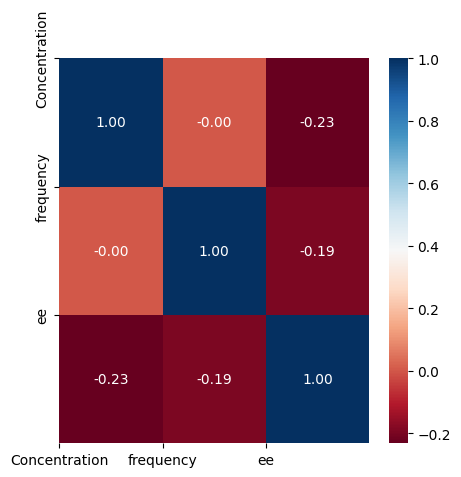

In [ ]:
corr = data.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(5,5))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

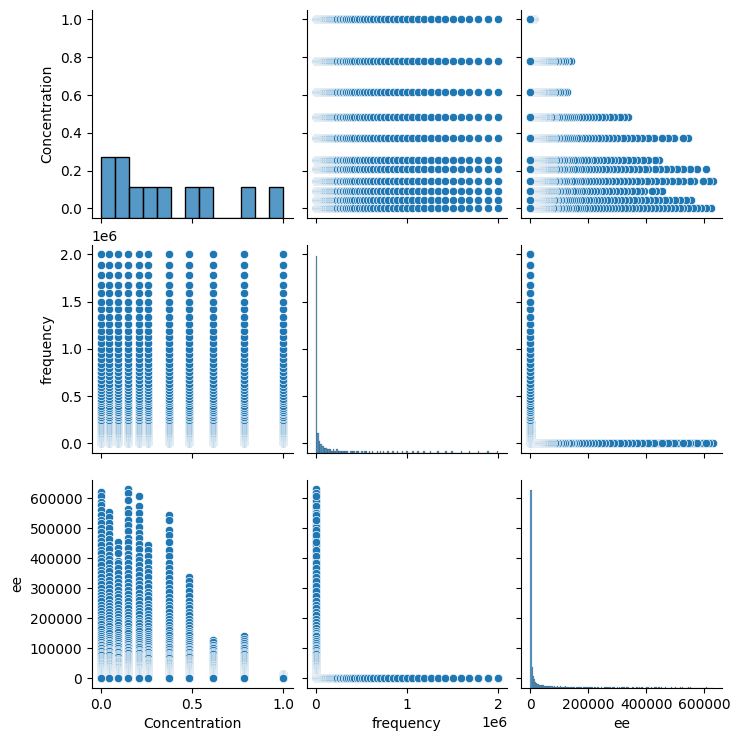

In [ ]:
sns.pairplot(data)
plt.show()

# Applying Algorithm

 RANDOM FOREST



In [ ]:
# Random Forest Model
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
regressor.score(X_test,y_test)

0.9957450524936072

In [ ]:
regressor2 = cross_val_score(estimator=regressor,X=X_train,y=y_train,cv=10)
regressor2.mean()

0.9934344347802352

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.022642108277996634
Mean Squared Error: 0.004313466197747428
Root Mean Squared Error: 0.06567698377473975


In [ ]:
# Calculate the absolute errors
errors = abs(y_pred - y_test)

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 98.74 %.


ANN

In [ ]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=2))  # Two input features
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='linear'))  # One output for regression

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
56/56 [==============================] - 1s 2ms/step - loss: 0.8905
Epoch 2/50
56/56 [==============================] - 0s 2ms/step - loss: 0.8613
Epoch 3/50
56/56 [==============================] - 0s 2ms/step - loss: 0.8500
Epoch 4/50
56/56 [==============================] - 0s 2ms/step - loss: 0.8390
Epoch 5/50
56/56 [==============================] - 0s 2ms/step - loss: 0.8373
Epoch 6/50
56/56 [==============================] - 0s 2ms/step - loss: 0.8249
Epoch 7/50
56/56 [==============================] - 0s 2ms/step - loss: 0.8204
Epoch 8/50
56/56 [==============================] - 0s 2ms/step - loss: 0.8185
Epoch 9/50
56/56 [==============================] - 0s 2ms/step - loss: 0.8104
Epoch 10/50
56/56 [==============================] - 0s 2ms/step - loss: 0.8036
Epoch 11/50
56/56 [==============================] - 0s 2ms/step - loss: 0.8164
Epoch 12/50
56/56 [==============================] - 0s 2ms/step - loss: 0.8075
Epoch 13/50
56/56 [==============================

In [ ]:
y_pred = model.predict(X_test)

14/14 [==============================] - 0s 2ms/step


In [ ]:
mse = MSE(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
rmse = np.sqrt(mse)
print("RMSE :", rmse)

Mean Squared Error: 0.7214760227099397
RMSE : 0.8493974468468455


KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
k = 3

In [ ]:
knn = KNeighborsRegressor(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=3)

In [ ]:
Y_pred = knn.predict(X_test_scaled)

In [ ]:
cv_svr_knn = cross_val_score(estimator=knn, X=X_train, y=y_train, cv=10)

In [ ]:
mse = MSE(y_test, Y_pred)
print(f'Mean Squared Error: {mse}')
rmse = np.sqrt(mse)
print("RMSE :", rmse)

Mean Squared Error: 0.002246152687518079
RMSE : 0.04739359331722041
